## 3/2/18 just needed another copy of this to try some different things/maybe clean stuff up

In [1]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
%matplotlib inline



importdata = np.genfromtxt('IS400.csv',delimiter=',');  #read in data that i output from matlab. input format has each
                                                        #of the 16 Temperature data sets stacked vertically. 
npoints = 101; #each T has 101 points
IS400 = np.zeros((16,npoints,5)) #Initialize new 3d array to hold data. note: first index is what we would traditionally 
                            #think of as the last index. it makes sense though when you think hierarchically,
                            #i.e. main list has 16 elements each of which has 101 smaller elements containing 5 elemnts. 
for i in range(0,16):
    IS400[i,:,:]=importdata[(npoints*i):(npoints*(i+1)) , :] #slice the data into subarrays  
    
## Function definitions

def Zr(T): #pulls out Z'
    return IS400[T,:,3]
def Zi(T): #pulls out Z''
    return IS400[T,:,4]
def w(T): #pulls out omega
    return IS400[T,:,0]



  
    


[0, 1, 0, 1]

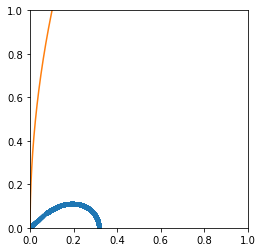

In [165]:
## Fake data for testing
R_act3=.1
wk_act3 = 10
R_act2=10
wk_act2 = .1
#noise= 0.01
wt = np.concatenate((np.linspace(.01,100,10000),np.linspace(101,1e4,1000)))
Zr3 = np.real(np.sqrt(R_act3/(1+(1j*wt/wk_act3))))
Zi3 = np.imag(np.sqrt(R_act3/(1+(1j*wt/wk_act3))))
Zr2 = np.real((0/3)+R_act2/(1+1j*wt/wk_act2))
Zi2 = np.imag((0/3)+R_act2/(1+1j*wt/wk_act2))
#Zr2 = np.sqrt(R_act/(1+(w/wk_act)**2))#+noise*np.random.random(w.size)
#Zi2 = -np.sqrt(R_act*w/(wk_act*(1+(w/wk_act)**2)))#+noise*np.random.random(w.size)
fig,ax= plt.subplots(1,1)
ax.plot(Zr3,-Zi3,'.',Zr2,-Zi2)
ax.set_aspect('equal')
ax.axis([0,1, 0,1])


In [2]:
def circuit_model(w,Rs,Rc,C,n):
    return Rs+(Rc/(1+((1j*w)**n)*C*Rc))

def circuit_resid(params,w,Zr,Zi):
    parvals = params.valuesdict()
    Rs = parvals['Rs']
    Rc = parvals['Rc']
    C = parvals['C']
    n = parvals['n']
    model_real= np.real(circuit_model(w,Rs,Rc,C,n))#np.real(Rs+(Rc/(1+((1j*w)**n)*C*Rc)))
    model_im= np.imag(circuit_model(w,Rs,Rc,C,n))
    #model1 = np.sqrt(R/(1+(w/wk)**2))
    #model2 = -np.sqrt(R*w/(wk*(1+(w/wk)**2)))
    resid1 = model_real-Zr
    resid2 = model_im-Zi
    return np.concatenate((resid1,resid2))

In [3]:
params = lmf.Parameters()  #add parameters with guesses
params.add('Rs',value = 0.1, min = 0)
params.add('Rc',value = 1, min = 0)
params.add('C',value = 1e-5, min = 0)
params.add('n',value = 1, min = 0)


fit = lmf.minimize(circuit_resid,params,args = (w(15)[-59:],Zr(15)[-59:],Zi(15)[-59:]))
Rsfit = fit.params['Rs'].value
Rcfit = fit.params['Rc'].value
Cfit = fit.params['C'].value
nfit = fit.params['n'].value
fit.params

Parameters([('Rs',
             <Parameter 'Rs', value=0.054102519757732948 +/- 0.00235, bounds=[0:inf]>),
            ('Rc',
             <Parameter 'Rc', value=2.7659167075212241 +/- 0.00447, bounds=[0:inf]>),
            ('C',
             <Parameter 'C', value=5.9563173973042893e-06 +/- 1.03e-07, bounds=[0:inf]>),
            ('n',
             <Parameter 'n', value=0.92444133370083281 +/- 0.00151, bounds=[0:inf]>)])

Text(0,0.5,"-z''")

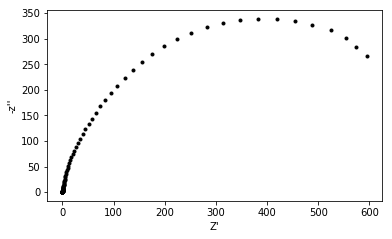

In [76]:
#Just looking at the low T data
fig, ax = plt.subplots(1,1)
ax.plot(Zr(4)[-96:],-Zi(4)[-96:],'k.')
ax.set_aspect('equal')
ax.set_xlabel("Z'")
ax.set_ylabel("-z''")
#ax.set_xlim([0,1]);
#ax.set_ylim([0,1]);


In [77]:
params = lmf.Parameters()  #add parameters with guesses
params.add('Rs',value = 5, min = 0, max = 50)
params.add('Rc',value = 1000, min = 0)
params.add('C',value = 1e-5, min = 0, max = 1e-4)
params.add('n',value = 1, min = .8, max = 1.2)


fit = lmf.minimize(circuit_resid,params,args = (w(4)[-96:],Zr(4)[-96:],Zi(4)[-96:]))
Rsfit = fit.params['Rs'].value
Rcfit = fit.params['Rc'].value
Cfit = fit.params['C'].value
nfit = fit.params['n'].value
fit.params

Parameters([('Rs',
             <Parameter 'Rs', value=0.58201496284036036 +/- 0.364, bounds=[0:50]>),
            ('Rc',
             <Parameter 'Rc', value=783.9965324227079 +/- 2.93, bounds=[0:inf]>),
            ('C',
             <Parameter 'C', value=5.1942897159384605e-06 +/- 7.41e-08, bounds=[0:0.0001]>),
            ('n',
             <Parameter 'n', value=0.90095205119633948 +/- 0.00217, bounds=[0.8:1.2]>)])

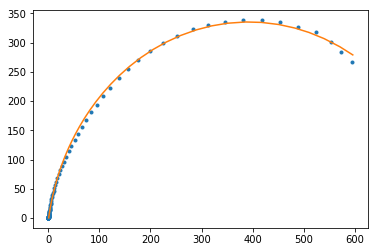

In [78]:
fig,ax = plt.subplots(1,1)
ax.plot(Zr(4)[-96:],-Zi(4)[-96:],'.')
ax.plot(np.real(Rsfit+(Rcfit/(1+((1j*w(4)[-96:])**nfit)*Cfit*Rcfit))),-np.imag(Rsfit+(Rcfit/(1+((1j*w(4)[-96:])**nfit)*Cfit*Rcfit))))
#ax.set_aspect('equal')